# Guided Projects Artificial Intelligence & Machine Learning
## Guided Projects: Feature Engineering
### Hashing: Querying in Face Datasets
Hashing is most commonly used to implement hash tables and for data encryption. A hash table 
stores key/value pairs in the form of a list, while the hash function maps the elements of the dataset 
via a key and generates hash values. A real-world recognition system has to cope with several 
unseen individuals and determine whether a given face image is registered or not, and thus, certain 
elements in databases can be found much faster-using hashing functions and classification 
methods.
### Question:
Implement a basic hashing model from scratch that hashes the images. You can use any 
dataset of few images and can implement a-hash or any other hashing algorithm of your choice. 
For a-hash, given any images, first resize the image to a suitable size, followed by grayscale 
conversion of the image. Then mean normalize the image to obtain a binary image, whose sum 
can be used as a hash value. Using the hash model, encode all the images present inside your 
directory and then search for images similar to the query image.

In [2]:
# Importing the required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
# Reading multiple images from the folder
mydir = os.getcwd()
data_dir = os.path.join(mydir, 'YALE')
imgs = os.listdir(data_dir)
images = []
for file in imgs:
    file_path = os.path.join(data_dir, file)
    img = mpimg.imread(file_path)
    if img is not None:
        images.append(img)
print('Total images are: {}'.format(len(images)))

Total images are: 165


In [22]:
# Vectorizing the images and storing them in a list
imgs_vec = []
for image in images:
    row, col = image.shape
    img_vec = image.reshape(row*col)
    img_vec_norm = img_vec/np.linalg.norm(img_vec)
    imgs_vec.append(img_vec_norm)
print(f'The number of images are: {len(imgs_vec)}')
print(f'The shape of normalized flattened images is: {img_vec_norm.shape}')

The number of images are: 165
The shape of normalized flattened images is: (45045,)


####  Locatily sensitive Hashing - Random Projections

In [33]:
# Generator function to generate random unit vectors for Hashing
def genRandomHashVec(m, length):
    hash_vec = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        v_ = v/np.linalg.norm(v)
        hash_vec.append(v_)
    return hash_vec

In [29]:
# Function for local sensitive hashing
def lsh(hash_vec, data_pt):
    hash_code = []
    for i in range(len(hash_vec)):
        if np.dot(data_pt, hash_vec[i])>0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return hash_code


In [36]:
# Generate 10 random vectors of the same size as image vector
hash_vector = genRandomHashVec(10, len(imgs_vec[0]))
np.array(hash_vector).shape

(10, 45045)

In [37]:
#Test the lsh fuction
lsh(hash_vector, imgs_vec[0])

['0', '1', '0', '1', '1', '1', '0', '0', '1', '1']

In [39]:
# Creating an image dictionary using the hash as keys
image_dict = {}
for i in range(len(imgs_vec)):
    hash_code = lsh(hash_vector, imgs_vec[i])
    str_hash_code = ''.join(hash_code)
    if str_hash_code not in image_dict.keys():
        image_dict[str_hash_code] = [i]
    else:
        image_dict[str_hash_code].append(i)
               

In [41]:
# Display the hashes
col_names = ['Hash_Code', 'Image_Index']
df = pd.DataFrame(image_dict.items(), columns = col_names)
df.head()

Hash_Code                                        Image_Index
0  0101110011    [0, 15, 16, 19, 21, 22, 58, 133, 134, 136, 154]
1  0111110001  [1, 2, 4, 5, 7, 8, 9, 10, 26, 27, 29, 34, 35, ...
2  0111010011  [3, 44, 47, 57, 63, 80, 91, 102, 104, 106, 109...
3  0111101000                                       [6, 28, 160]
4  0101111000                                       [11, 24, 74]

In [61]:
# Get the keys and values of the of the dictionary
keys = list(image_dict.keys())
values = list(image_dict.values())

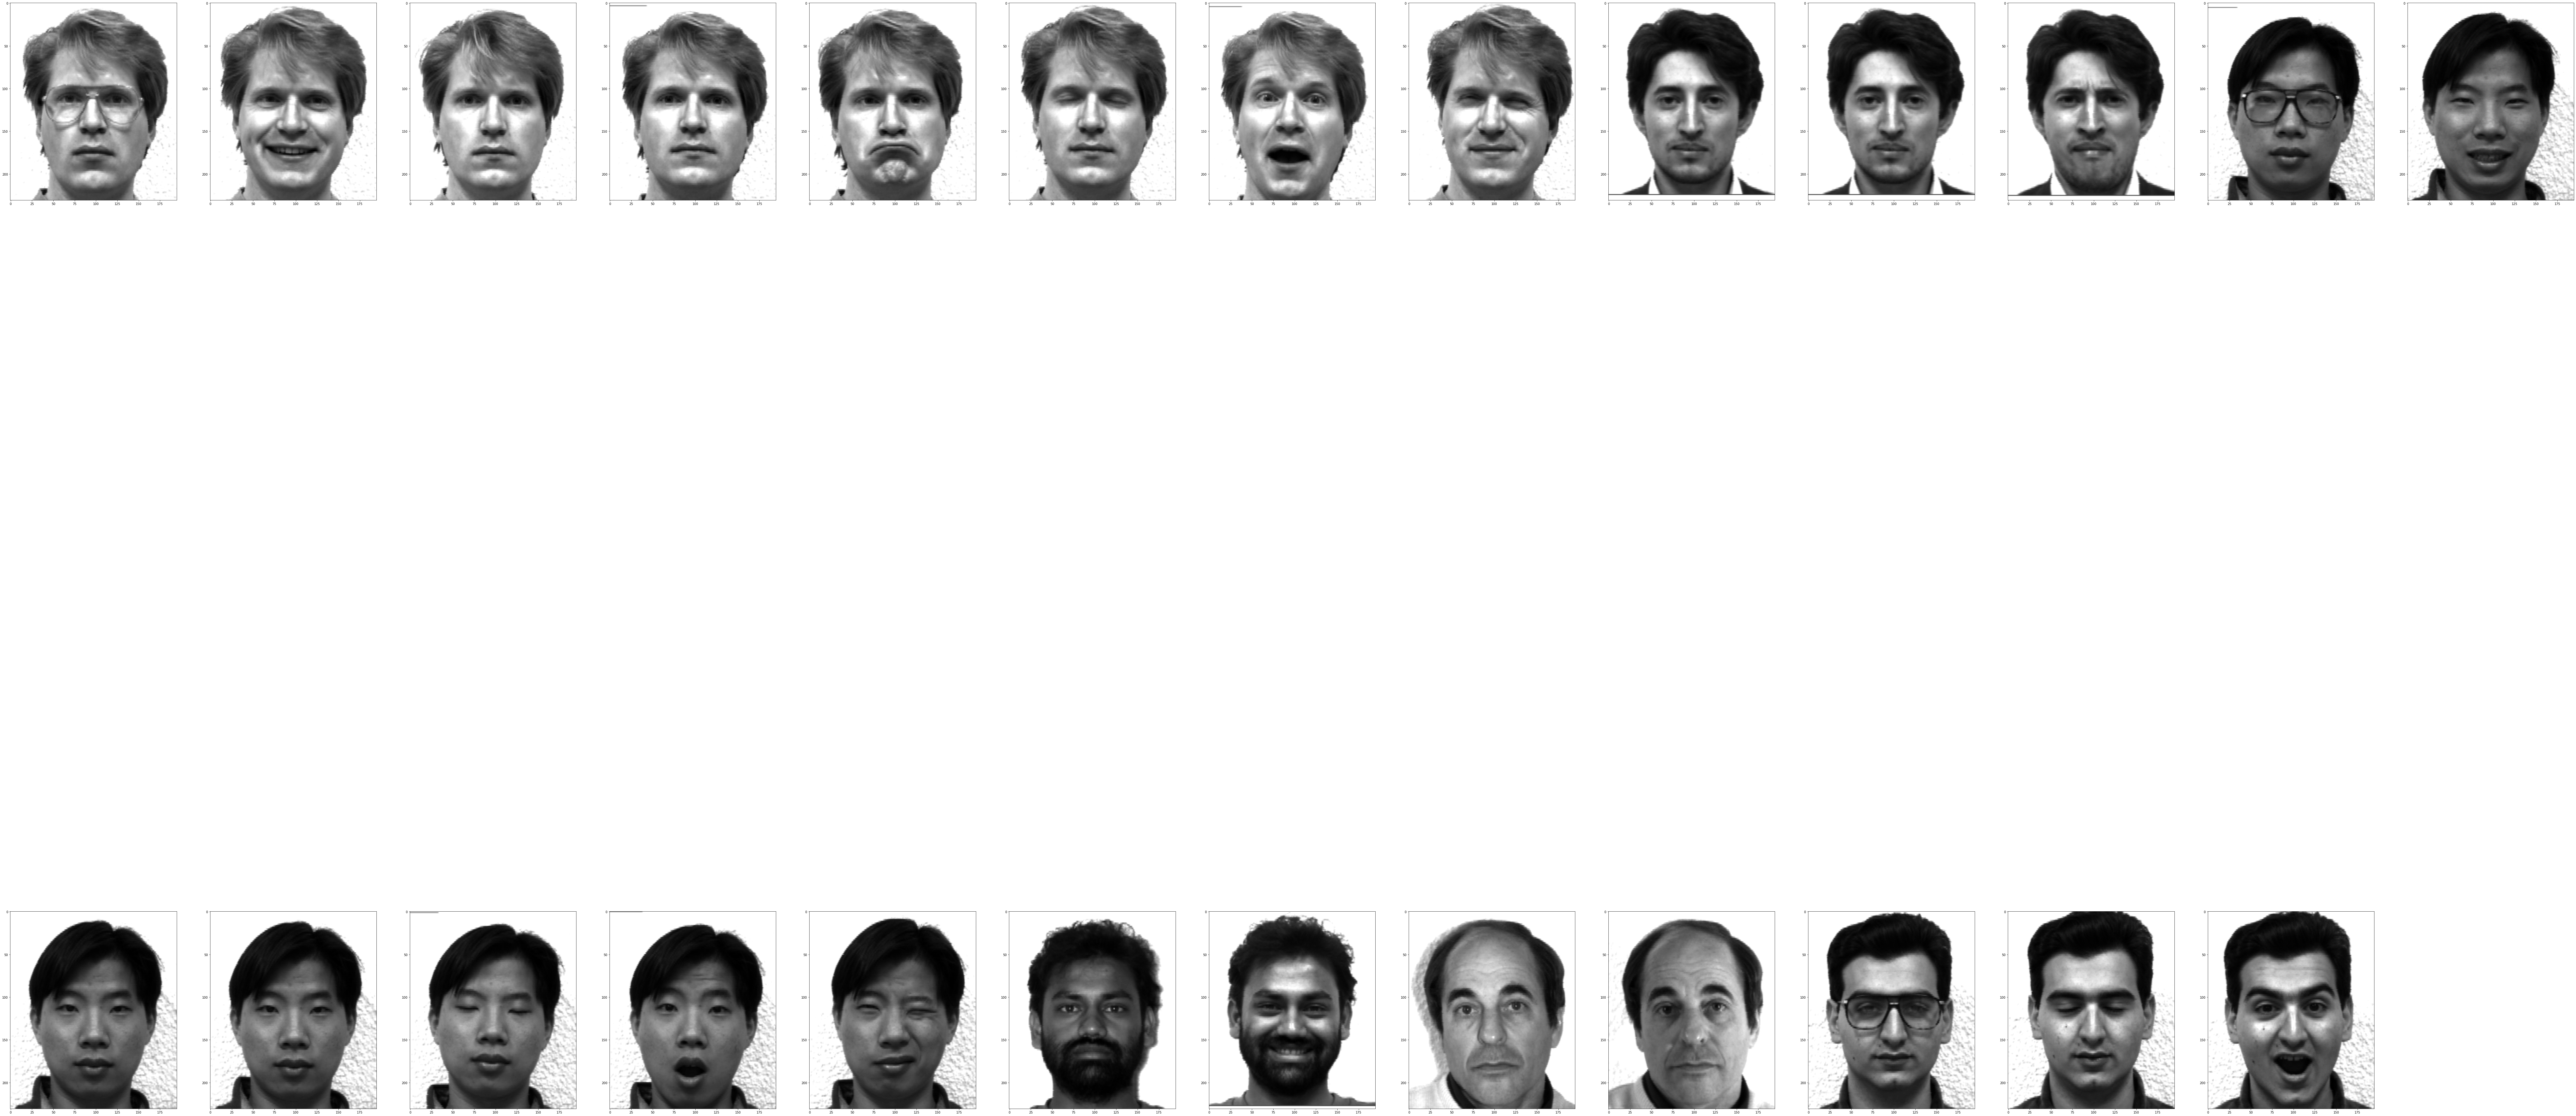

In [65]:
# Plotting images with same hash cod
igs = [images[i] for i in range(len(images)) if i in values[1]]
fig = plt.figure()
cols = 2
n_images = len(igs)
for n, image in zip(range(n_images), igs):
    ax = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n+1)
    plt.gray()
    plt.imshow(image)
fig.set_size_inches(np.array(fig.get_size_inches())*n_images)
plt.show()